In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
76,8.35,12.0,0
125,7.46,55.0,1
129,6.81,39.0,1
482,7.56,8.0,0
785,6.07,29.0,1


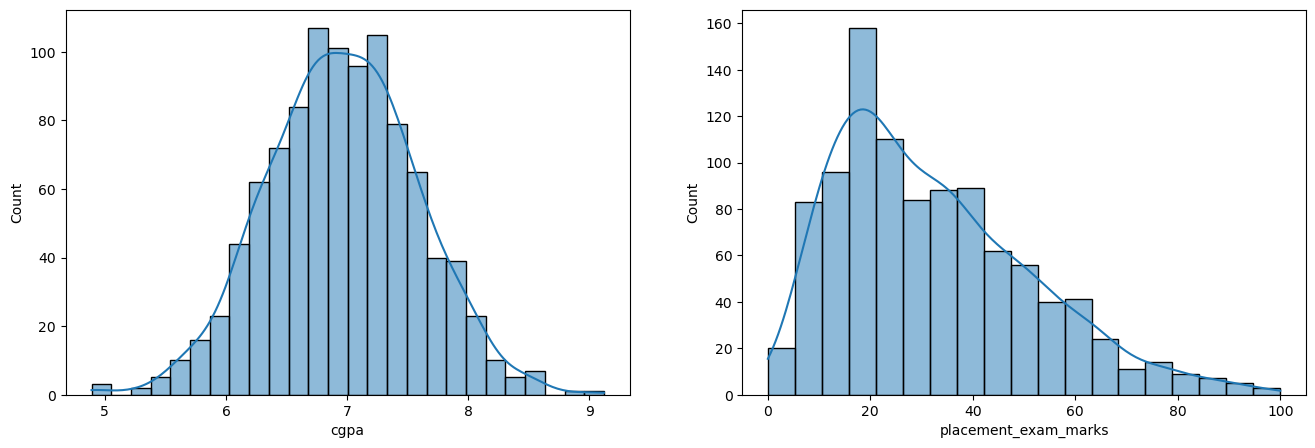

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [33]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

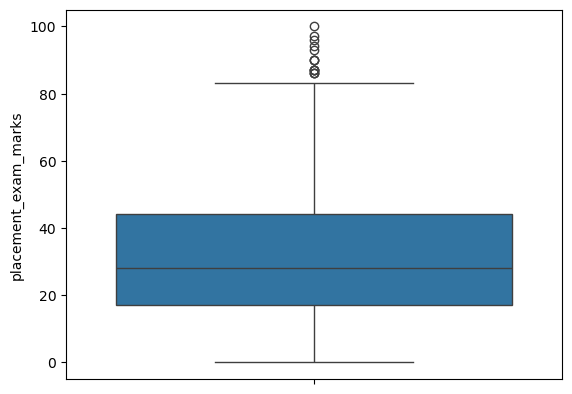

In [34]:
sns.boxplot(df['placement_exam_marks'])

In [35]:
# Finding the IQR 
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [36]:
percentile25

17.0

In [37]:
percentile75

44.0

In [39]:
iqr = percentile75 - percentile25

In [40]:
iqr

27.0

In [41]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [42]:
print("upper_limit",upper_limit) 
print("lower_limit",lower_limit) 

upper_limit 84.5
lower_limit -23.5


# Finding Outliers 

In [44]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [45]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


# Trimming

In [46]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [47]:
new_df.shape

(985, 4)

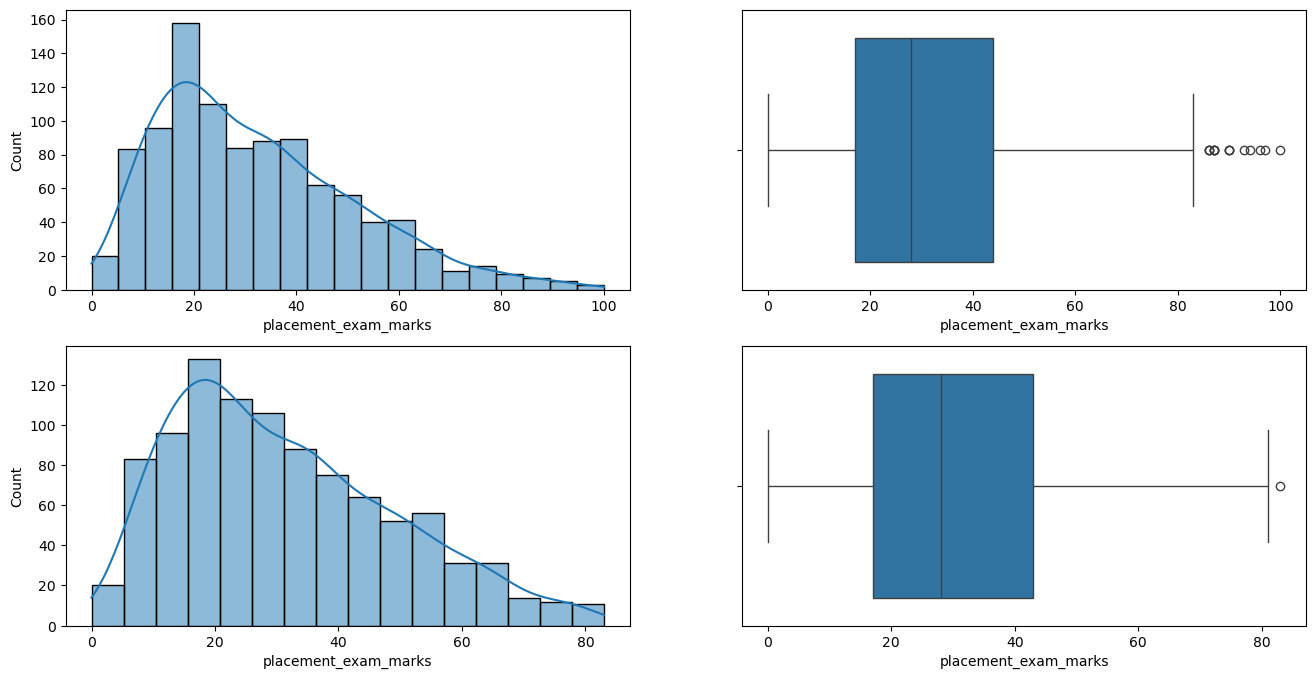

In [49]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2, 2, 3)
sns.histplot(new_df['placement_exam_marks'], kde=True)

plt.subplot(2, 2, 4)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.show()

# Capping 

In [50]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [51]:
new_df_cap.shape

(1000, 4)

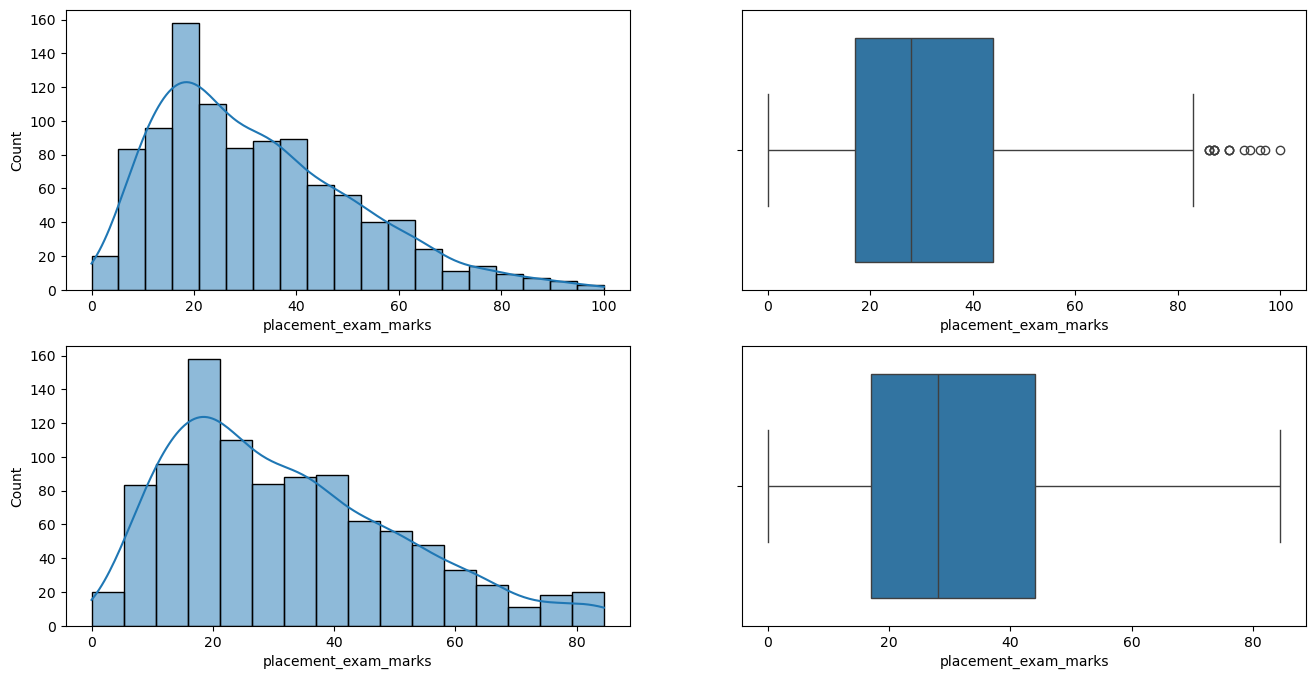

In [52]:
# Comparing
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2, 2, 3)
sns.histplot(new_df_cap['placement_exam_marks'], kde=True)

plt.subplot(2, 2, 4)
sns.boxplot(x=new_df_cap['placement_exam_marks'])

plt.show()